**Part 2. AI Agent 활용 프로젝트**

- Chapter 04. 사전구축 Agent

    - **📒[실습]** Clip 03. AI Data Science Team Agent

## Multi-Agents for Pandas Data Analysis

2개의 서브 Agent:

1. **Data Wrangling Agent:** Handles data wrangling, transformations, and analysis using Pandas.
2. **Data Visualization Agent:** Visualize the results if a user requests a plot.

In [1]:
import getpass
import os


def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")


_set_env("OPENAI_API_KEY")

In [2]:
LOG      = False
LOG_PATH = os.path.join(os.getcwd(), "logs/")

In [3]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model = "gpt-4o-mini")

### Read a Data Set

`churn_data.csv`: 통신 회사의 고객 데이터

In [4]:

import pandas as pd


df = pd.read_csv("data/churn_data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Agent 생성하기

#### DataWranglingAgent

The `DataWranglingAgent` is a subagent that handles data wrangling, transformations, and analysis using Pandas.

#### DataVisualizationAgent

The `DataVisualizationAgent` is a subagent that visualizes the results if a user requests a plot.

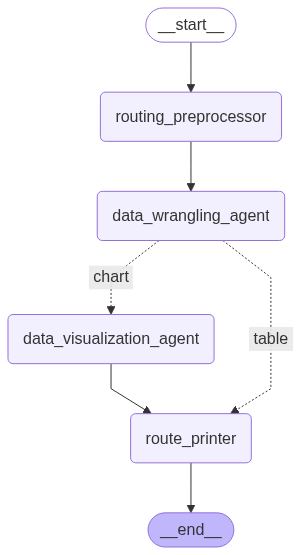

In [5]:
from ai_data_science_team import PandasDataAnalyst, DataWranglingAgent, DataVisualizationAgent

pandas_data_analyst = PandasDataAnalyst(
    model = llm,
    data_wrangling_agent = DataWranglingAgent(
        model = llm,
        log = LOG,
        log_path = LOG_PATH,
        bypass_recommended_steps=True,
    ),
    data_visualization_agent = DataVisualizationAgent(
        model = llm,
        n_samples = 10,
        log = LOG,
        log_path = LOG_PATH,
    ),
)

pandas_data_analyst

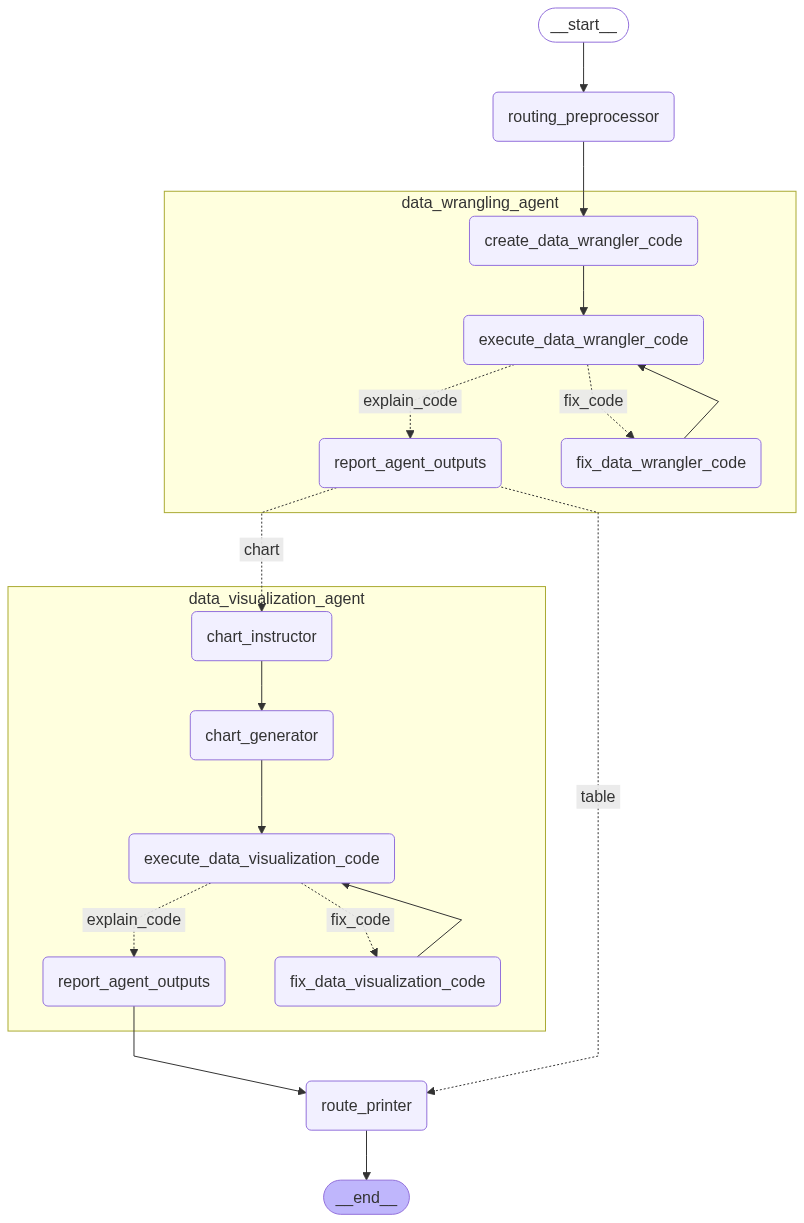

In [6]:
pandas_data_analyst.show(xray=1)

## Example 1: What are the first 5 rows of the data?

In [7]:
pandas_data_analyst.invoke_agent(
    user_instructions = "What are the first 5 rows of the data?",
    data_raw=df,
)

---PANDAS DATA ANALYST---
*************************
---PREPROCESS ROUTER---
---DATA WRANGLING AGENT----
    * CREATE DATA WRANGLER CODE
    * EXECUTING AGENT CODE
    * REPORT AGENT OUTPUTS
---ROUTER: CHART OR TABLE---
---ROUTE PRINTER---
    Route: table
---END---


### Response

The response produced contains everything we need to understand the data cleaning decisions made and get the cleaned dataset. 

In [8]:
pandas_data_analyst.get_state_keys()

['messages',
 'user_instructions',
 'user_instructions_data_wrangling',
 'user_instructions_data_visualization',
 'routing_preprocessor_decision',
 'data_raw',
 'data_wrangled',
 'data_wrangler_function',
 'data_visualization_function',
 'plotly_graph',
 'plotly_error',
 'max_retries',
 'retry_count']

Not all fields will be filled if the agent did not need to use them.

- **data_wrangler_function**: The Python function that was generated by the Data Wrangling Agent.
- **data_wrangled**: The Pandas data frame that was generated by the agent.
- **data_visualization_function**: The Python function that was generated by the Data Visualization Agent.
- **plotly_graph**: The Plotly graph that was generated by the Data Visualization Agent.

#### Pandas Data Frame

In [9]:
pandas_data_analyst.get_data_wrangled()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Pandas Code

In [10]:
pandas_data_analyst.get_data_wrangler_function(markdown=True)

```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: data_wrangling_agent
# Time Created: 2025-06-02 15:15:46

def data_wrangler(data_list):
    import pandas as pd
    import numpy as np
    '''
    Wrangle the data provided in data.
    
    data_list: A list of one or more pandas data frames containing the raw data to be wrangled.
    '''


    # Ensure the input is a list; if not, convert it to a list
    if not isinstance(data_list, list):
        data_list = [data_list]

    # Assuming we are working with the first dataset in the list named "main"
    df = data_list[0]  # Get the first DataFrame from the list

    # Handle 'TotalCharges' as it may contain non-numeric values (spaces, etc.)
    # Convert 'TotalCharges' to numeric, forcing errors to NaN (in case of invalid parsing)
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

    # Return only the first 5 rows of the DataFrame
    return df.head()
```

## Example 2: Plot a boxplot with violin between monthly payment and churn.

`pip install nbformat`

In [11]:
pandas_data_analyst.invoke_agent(
    user_instructions = "Plot a boxplot with violin between monthly payment and churn.",
    data_raw=df,
)

---PANDAS DATA ANALYST---
*************************
---PREPROCESS ROUTER---
---DATA WRANGLING AGENT----
    * CREATE DATA WRANGLER CODE
    * EXECUTING AGENT CODE
    * REPORT AGENT OUTPUTS
---ROUTER: CHART OR TABLE---
---DATA VISUALIZATION AGENT----
    * CREATE CHART GENERATOR INSTRUCTIONS


<string>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


<string>:50: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.


    * CREATE DATA VISUALIZATION CODE
    * EXECUTING AGENT CODE
    * REPORT AGENT OUTPUTS
---ROUTE PRINTER---
    Route: chart
---END---


In [12]:
pandas_data_analyst.get_plotly_graph()

#### Workflow Summary

This is useful to see the steps taken and the code generated by the agent.

In [13]:
pandas_data_analyst.get_workflow_summary(markdown=True)



# Pandas Data Analyst Workflow Summary

This workflow contains 2 agents:

- **Agent 1:** data_wrangling_agent

- **Agent 2:** data_visualization_agent
# Data Wrangling Agent Outputs

## ---RECOMMENDED STEPS----
<recommended_steps_not_found_in_state>

## ---DATA WRANGLER FUNCTION----
```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: data_wrangling_agent
# Time Created: 2025-06-02 15:17:16

def data_wrangler(data_list):
    import pandas as pd
    import numpy as np
    '''
    Wrangle the data provided in data.
    
    data_list: A list of one or more pandas data frames containing the raw data to be wrangled.
    '''


    # Ensure data_list is a list
    if not isinstance(data_list, list):
        data_list = [data_list]
    
    # Combine all DataFrames in the list into a single DataFrame
    df = pd.concat(data_list, ignore_index=True)

    # Convert 'TotalCharges' to a numeric dtype (originally object)
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

    # Handle missing values by filling them with 0 for numerical and 'No' for categorical columns
    df['TotalCharges'].fillna(0, inplace=True)

    # Convert binary categorical columns to numeric (0 and 1)
    binary_columns = ['SeniorCitizen', 'Churn']
    for col in binary_columns:
        df[col] = df[col].map({'No': 0, 'Yes': 1})

    # Convert other relevant categorical columns to category dtype for memory efficiency
    categorical_columns = [
        'gender', 'Partner', 'Dependents', 
        'PhoneService', 'MultipleLines', 
        'InternetService', 'OnlineSecurity', 
        'OnlineBackup', 'DeviceProtection', 
        'TechSupport', 'StreamingTV', 
        'StreamingMovies', 'Contract', 
        'PaperlessBilling', 'PaymentMethod'
    ]
    for col in categorical_columns:
        df[col] = df[col].astype('category')

    # Create a new feature: MonthlyCharges vs TotalCharges ratio
    df['ChargesRatio'] = df['MonthlyCharges'] / (df['TotalCharges'] + 1e-5)  # add a small constant to avoid division by zero

    # Replace instances of 'No phone service' and 'No internet service' with 'No'
    df.replace({'No phone service': 'No', 'No internet service': 'No'}, inplace=True)

    # Return the final wrangled DataFrame
    return df
```

## ---DATA WRANGLER FUNCTION PATH----
```python
None
```

## ---DATA WRANGLER FUNCTION NAME----
```python
data_wrangler
```

## ---DATA WRANGLER ERROR----
None

# Data Visualization Agent Outputs

## ---RECOMMENDED STEPS----
# Recommended Data Cleaning Steps:
CHART GENERATOR INSTRUCTIONS: 
Create a combined boxplot and violin plot using Plotly to visualize the relationship between the 'MonthlyCharges' and 'Churn' columns in the dataset. Set the title of the chart to "Monthly Charges Distribution by Churn Status". The x-axis should be labeled "Churn Status" and the y-axis should be labeled "Monthly Charges". Use the 'Churn' column as a categorical variable with two unique values (0 and 1) to represent non-churned and churned customers, respectively, and the 'MonthlyCharges' column as a continuous variable.

## ---DATA VISUALIZATION FUNCTION----
```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: data_visualization_agent
# Time Created: 2025-06-02 15:17:24

def data_visualization(data_raw):
    import pandas as pd
    import numpy as np
    import json
    import plotly.express as px
    import plotly.io as pio





    # Create a combined boxplot and violin plot
    fig = px.violin(data_raw, x='Churn', y='MonthlyCharges', box=True, 
                     title="Monthly Charges Distribution by Churn Status",
                     labels={'Churn': 'Churn Status', 'MonthlyCharges': 'Monthly Charges'},
                     points='all', hover_data=data_raw.columns)
    
    # Update the layout to add axis titles
    fig.update_layout(
        xaxis_title="Churn Status",
        yaxis_title="Monthly Charges"
    )
    
    fig_json = pio.to_json(fig)
    fig_dict = json.loads(fig_json)
    
    return fig_dict
```

## ---DATA VISUALIZATION FUNCTION PATH----
```python
None
```

## ---DATA VISUALIZATION FUNCTION NAME----
```python
data_visualization
```

## ---DATA VISUALIZATION ERROR----
None